Imports.

In [ ]:
# from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr, uniform, binom, norm, poisson, expon # Some later exercises (eg. 12th) need this.
import seaborn as sns

Dataloads.

In [ ]:
# global variables
PATH='/content/drive/MyDrive/Colab Notebooks/Project/datasets/'

# Google Drive mount
# drive.mount('/content/drive', force_remount=True)

# Loads
food_consumption = pd.read_csv(PATH+'food_consumption.csv')
amir_deals = pd.read_csv(PATH+'amir_deals.csv')
world_happiness = pd.read_csv(PATH+'world_happiness.csv')

First exercise.

In this I calculate mean and median values for consumption in both Belgium and USA.

In [ ]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country']=='Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country']=='USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


Second exercise.

Visualisation time!

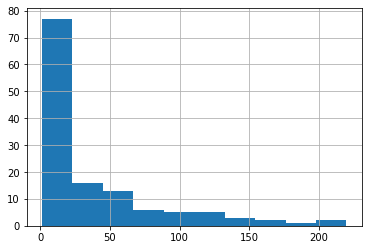

In [ ]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category']=='rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

Third exercise.

Let's get acquainted with numpy's linspace!

In [ ]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 5)))

# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 6)))

# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


Fourth exercise.

Std and var, as well as some histograms.

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


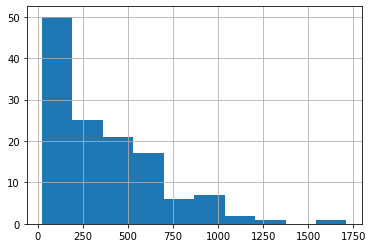

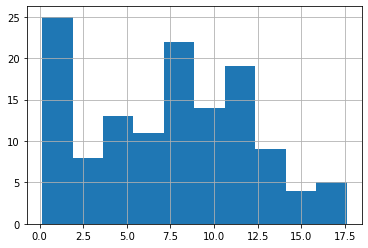

In [ ]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'std']))

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category']=='beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category']=='eggs' ]['co2_emission'].hist()
# Show plot
plt.show()

Fifth exercise.

Finding outliers using IQR (below Q1-IQR and above Q3+IQR).

In [ ]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
#print(emissions_by_country)

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr1 = q3-q1
#OR
iqr2 = iqr(emissions_by_country)

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr2
upper = q3 + 1.5 * iqr2

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country<lower) | (emissions_by_country>upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


Sixth exercise.

Calculating probabilities: performance review of certain Amir of a certain sales team.

In [ ]:
# Count the deals for each product
#counts = amir_deals.groupby('product').size().reset_index(name='counts')
counts = amir_deals['product'].value_counts()
#print(counts)

# Calculate probability of picking a deal with each product
probs = counts/counts.sum()
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


Seventh exercise.

Sampling Amir's deals.

In [ ]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5, replace=False)
print(sample_without_replacement)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11
     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


Ninth exercise.

Creating a probability distribution

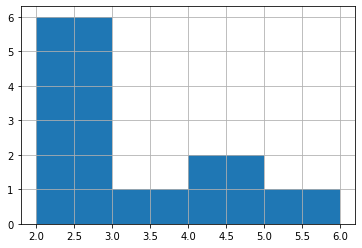

2    6
4    2
6    1
3    1
Name: group_size, dtype: int64
2.9000000000000004
0.30000000000000004


In [ ]:
# Defining a locally needed variable
restaurant_groups = pd.DataFrame({'group_id':	['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 'group_size':	[2, 4, 6, 2, 2, 2, 3, 2, 4, 2]})

# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6])
plt.show()

print(restaurant_groups['group_size'].value_counts())

# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups['group_size'].count()
#size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = pd.DataFrame(data=size_dist).reset_index()
size_dist.columns = ['group_size', 'prob']

# Calculate expected value
expected_value = (size_dist['group_size'] * size_dist['prob']).sum()
#expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size']>=4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

Tenth exercise.

An exercise in continuous uniform distribution. We will be calculating the expected waiting time assuming an occurence happens every 30 minutes.

In [ ]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


Eleventh exercise.

Simulations in continuous uniform distribution.

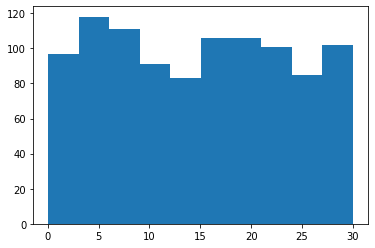

In [ ]:
# Set random seed to 334
np.random.seed(334)

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(min_time, max_time, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

Twelfth exercise.

Simulations in binomial distribution cases.

In [ ]:
# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

[1]
[0]
0.8461538461538461


Thirteenth exercise.

Calculating binomial probabilities.

In [ ]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.026999999999999996
0.784
0.21599999999999997


Fourteenth exercise.

Calculating binomial probabilities (still).

* Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
* Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.
* Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [ ]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


Fifteenth exercise.

Show a histogram of a worker's trades / deals.

* The distribution seems to be normal.

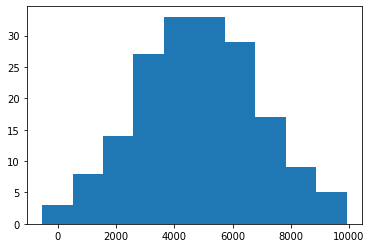

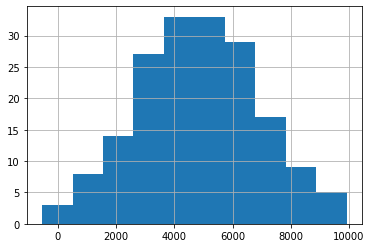

In [ ]:
# Histogram of amount with 10 bins and show plot
plt.hist(amir_deals['amount'], bins=10)
plt.show()
# The code below was the only one accepted by DataCamp. The result was almost the same.
amir_deals['amount'].hist(bins=10)
plt.show()

Sixteenth exercise.

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

So, we have here a normal distribution with:
* mean = 5000
* sd = 2000

There are four parts of this exercise:


1.   What's the probability of Amir closing a deal worth less than $7500?

2.   What's the probability of Amir closing a deal worth more than $1000?

3.   What's the probability of Amir closing a deal worth between 3000 and 7000 dollars?

4.   What amount will 25% of Amir's sales be less than?



In [ ]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)
print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)
print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)
print(pct_25)



0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


Simulating sales under new market conditions

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales DataFrame, which has already been created for you.

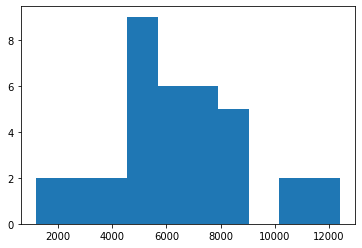

In [ ]:
# Calculate new average amount
new_mean = 5000*1.2

# Calculate new standard deviation
new_sd = 2000*1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

A simulation from the video involving showing sampling distributions of different number of trials of taking an average of 5 rolls of a 6-sided die.

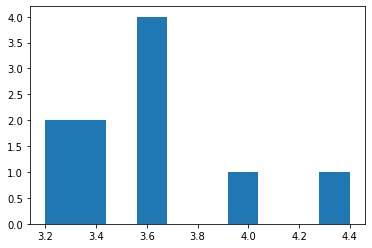

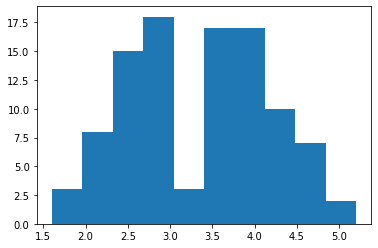

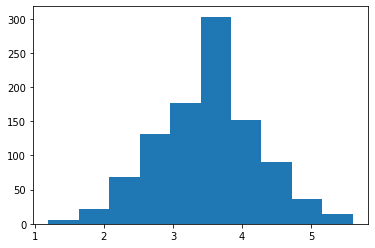

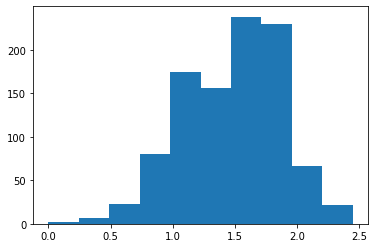

In [ ]:
# Define die:
die=pd.Series([1,2,3,4,5,6])

# 10 trials
sample_means = []
for i in range(10):
  sample_means.append(np.mean(die.sample(5, replace=True)))
plt.hist(sample_means)
plt.show()

# 100 trials
sample_means = []
for i in range(100):
  sample_means.append(np.mean(die.sample(5, replace=True)))
plt.hist(sample_means)
plt.show()

# 1000 trials
sample_means = []
# Added a plot of a sampling distribution of 1000 standard deviations on different die rolls done at the same time.
sample_sds = []
for i in range(1000):
  sample_means.append(np.mean(die.sample(5, replace=True)))
  sample_sds.append(np.std(die.sample(5, replace=True)))
plt.hist(sample_means)
plt.show()
plt.hist(sample_sds)
plt.show()

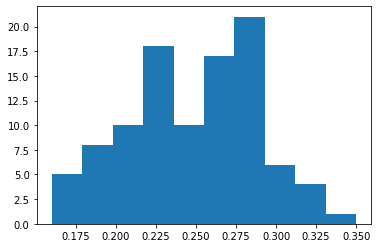

In [ ]:
# Calculating the mean from a distribution of proportions of drawing a particular name out of a list of names.
# Variable definitions:
sales_team = pd.Series(['Amir', 'Brian', 'Claire', 'Damian'])
sample_proportions = []

# Loop:
for i in range(100):
  st_sample = sales_team.sample(100, replace = True)
  sample_proportions.append(st_sample[st_sample=='Amir'].count()/100)

# Plot:
plt.hist(sample_proportions)
plt.show()

Seventeenth exercise.

In this one, we will focus on the sample mean and see the central limit theorem in action while examining the num_users column of amir_deals more closely, which contains the number of people who intend to use the product Amir is selling.

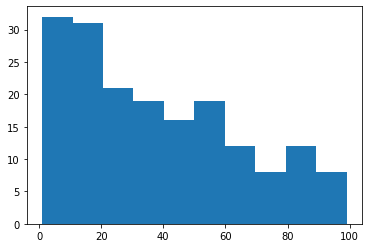

32.0
[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


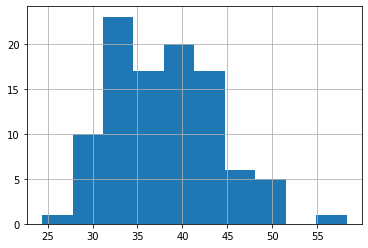

In [ ]:
# Create a histogram of num_users and show
plt.hist(amir_deals['num_users'])
plt.show()

# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# Take mean of samp_20
print(np.mean(samp_20))

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)

print(sample_means)

# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

Eighteenth exercise.

* Set the random seed to 321.
* Take 30 samples (with replacement) of size 20 from *all_deals['num_users']* and take the mean of each sample. Store the sample means in *sample_means*.
* Print the mean of *sample_means*.
* Print the mean of the *num_users* column of *amir_deals*.

I do not have the all_deals DF, so I will probably have to simulate it somehow 😀

PS. What I did was to replace all_deals DF with amir_deals DF 😆

In [ ]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = amir_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

38.821666666666665
37.651685393258425


Nineteenth exercise.

Tracking lead responses

Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

In [ ]:
# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)

# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

print(prob_coworker)

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print(prob_2_or_less)

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

print(prob_over_10)

0.1562934518505317
0.17140068409793663
0.23810330555354436
0.0028397661205137315


Twentieth exercise.

Modeling time between leads

To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, it takes 2.5 hours for him to respond. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

* Import expon from scipy.stats. What's the probability it takes Amir less than an hour to respond to a lead?
* What's the probability it takes Amir more than 4 hours to respond to a lead?
* What's the probability it takes Amir 3-4 hours to respond to a lead?

In [ ]:
# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

# Print probability response takes > 4 hours
print(1-expon.cdf(4, scale=2.5))

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.3296799539643607
0.20189651799465536
0.09929769391754684


**Uwaga!**

Muszę **koniecznie** sprawdzić dlaczego w tym przykładzie dla czasu między events wynoszącego 2.5 scale = 2.5, a nie jak w przykładzie z wykładu, gdzie dla czasu pomiędzy events równego 2, scale = 0.5.

Jest tu jakieś discrepancy.

Twenty-first exercise.

In this chapter, you'll be working with a dataset world_happiness containing results from the 2019 World Happiness Report. The report scores various countries based on how happy people in that country are. It also ranks each country on various societal aspects such as social support, freedom, corruption, and others. The dataset also includes the GDP per capita and life expectancy for each country.

In this exercise, you'll examine the relationship between a country's life expectancy (life_exp) and happiness score (happiness_score) both visually and quantitatively. seaborn as sns, matplotlib.pyplot as plt, and pandas as pd are loaded and world_happiness is available.

* Create a scatterplot of happiness_score vs. life_exp (without a trendline) using seaborn. Show the plot.
* Create a scatterplot of happiness_score vs. life_exp with a linear trendline using seaborn, setting ci to None. Show the plot.
* Calculate the correlation between life_exp and happiness_score. Save this as cor.

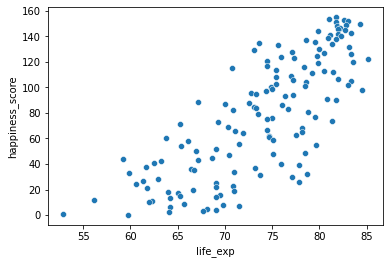

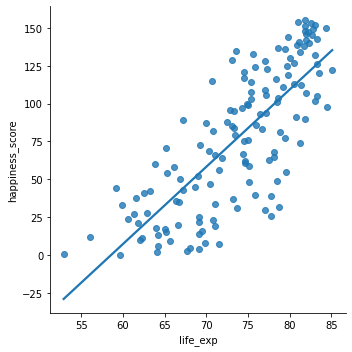

0.7802249053272062


In [ ]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)
plt.show()

# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness['happiness_score'].corr(world_happiness['life_exp'])
print(cor)

Twenty-second exercise.

What can't correlation measure?

While the correlation coefficient is a convenient way to quantify the strength of a relationship between two variables, it's far from perfect. In this exercise, you'll explore one of the caveats of the correlation coefficient by examining the relationship between a country's GDP per capita (gdp_per_cap) and happiness score.

pandas as pd, matplotlib.pyplot as plt, and seaborn as sns are imported, and world_happiness is loaded.

* Create a seaborn scatterplot (without a trendline) showing the relationship between gdp_per_cap (on the x-axis) and life_exp (on the y-axis). Show the plot
* Calculate the correlation between gdp_per_cap and life_exp and store as cor.

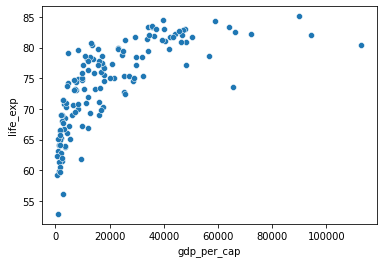

0.7019547642148012


In [ ]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()

# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)

Twenty-third exercise.

Transforming variables

When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable so that correlation can be computed. In this exercise, you'll perform a transformation yourself.

pandas as pd, numpy as np, matplotlib.pyplot as plt, and seaborn as sns are imported, and world_happiness is loaded.

* Create a scatterplot of happiness_score versus gdp_per_cap and calculate the correlation between them.
* Add a new column to world_happiness called log_gdp_per_cap that contains the log of gdp_per_cap.
* Create a seaborn scatterplot of log_gdp_per_cap and happiness_score and calculate the correlation between them.

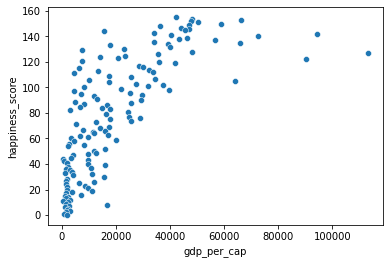

0.727973301222298


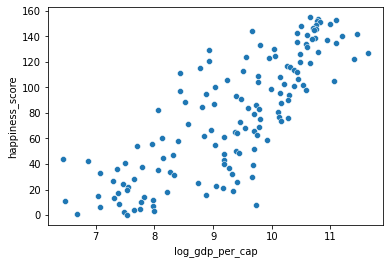

0.8043146004918288


In [ ]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(y='happiness_score', x='log_gdp_per_cap', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)